In [1]:
import warnings
warnings.filterwarnings("ignore") 

In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
DATA_DIR = "./datasets"
TRAIN_IMAGE_DIR = os.path.join(DATA_DIR, 'train')
VAL_IMAGE_DIR = os.path.join(DATA_DIR, 'val')

# Data exploration

## Class distribution

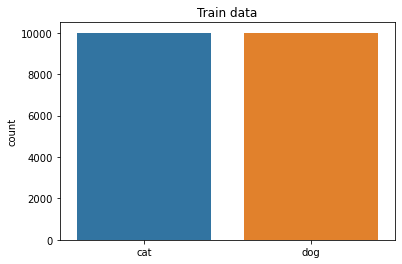

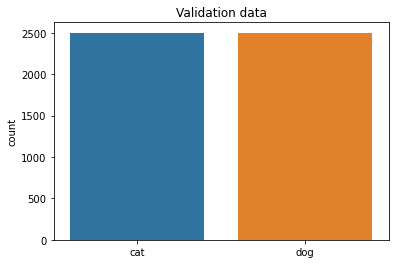

In [24]:
def plot_image_count(title, image_dir):
    labels = []
    for label in os.listdir(image_dir):
        for img in os.listdir(os.path.join(image_dir, label)):
            labels.append(img.split('.')[0])
    sns.countplot(labels)
    plt.title(title)
    plt.show()
    
plot_image_count('Train data', TRAIN_IMAGE_DIR)
plot_image_count('Validation data', VAL_IMAGE_DIR)

## Image samples

In [15]:
%matplotlib inline

nrows = 4
ncols = 4
index = 0 

train_cats_dir = os.path.join(TRAIN_IMAGE_DIR, 'cat')
train_dogs_dir = os.path.join(TRAIN_IMAGE_DIR, 'dog')

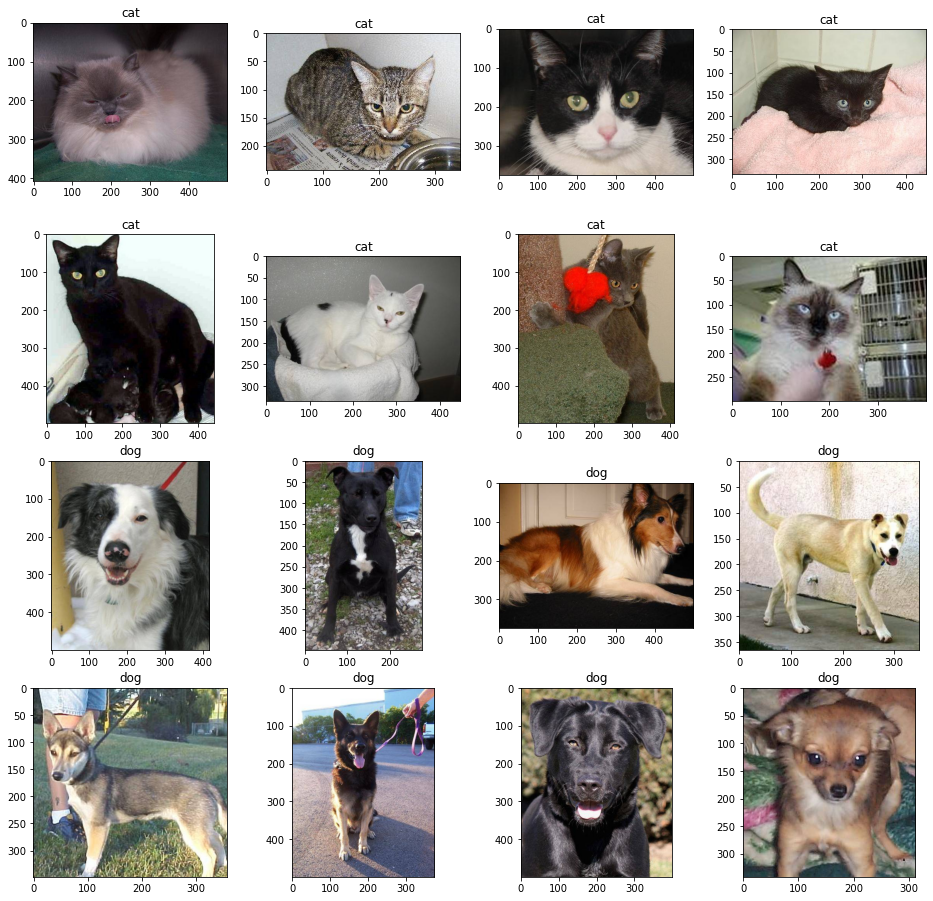

In [16]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

index += 8

cat_images = [os.path.join(train_cats_dir, fname) 
                for fname in os.listdir(train_cats_dir)[index-8:index] 
              ]

dog_images = [os.path.join(train_dogs_dir, fname) 
                for fname in os.listdir(train_dogs_dir)[index-8:index]
               ]

for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.title(img_path.split('.')[1].split('/')[-2])
    plt.imshow(img)

plt.show()

# Image transformation

In [26]:
import numpy as np
from torchvision import transforms

In [5]:
IMAGE_SIZE = (224, 224)

In [6]:
transformation = transforms.Compose([transforms.ToTensor(), 
                                     transforms.RandomHorizontalFlip(p=0.5), 
                                     transforms.RandomRotation(degrees=45), 
                                     transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
                                     transforms.Resize(IMAGE_SIZE)])

In [13]:
nrows = 4
ncols = 4
index = 0 

train_cats_dir = os.path.join(TRAIN_IMAGE_DIR, 'cat')
train_dogs_dir = os.path.join(TRAIN_IMAGE_DIR, 'dog')

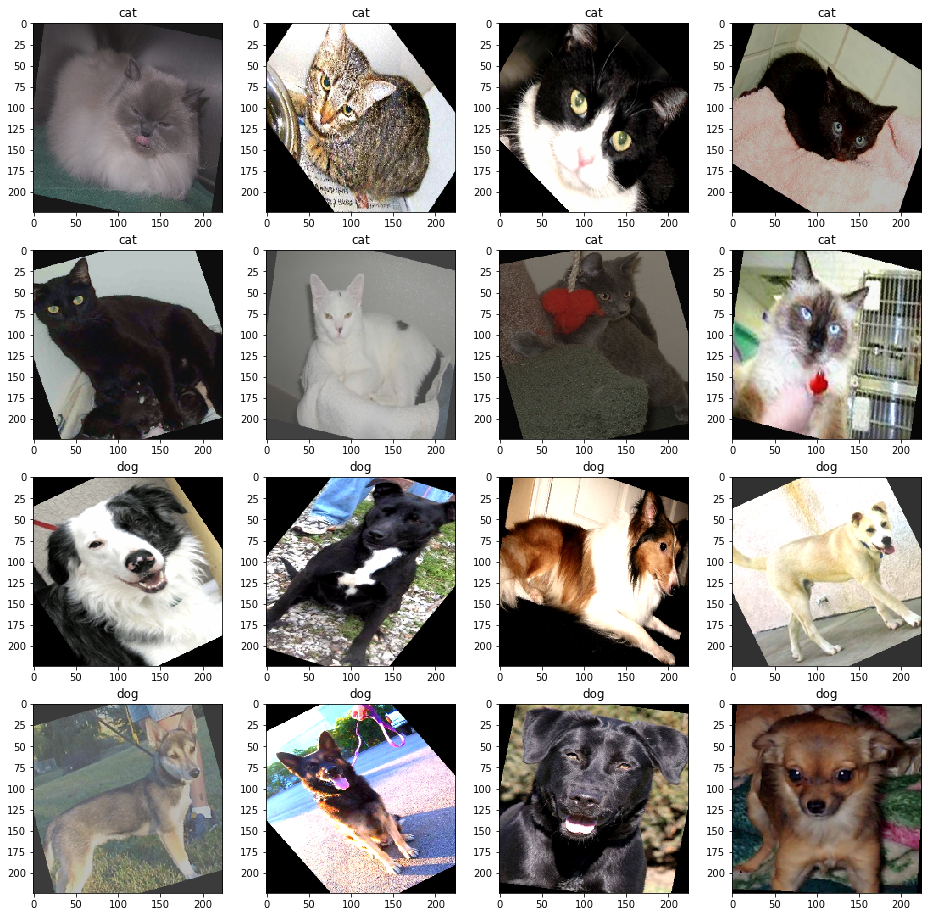

In [14]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

index += 8

cat_images = [os.path.join(train_cats_dir, fname) 
                for fname in os.listdir(train_cats_dir)[index-8:index] 
              ]

dogs_images = [os.path.join(train_dogs_dir, fname) 
                for fname in os.listdir(train_dogs_dir)[index-8:index]
               ]

for i, img_path in enumerate(cat_images + dogs_images):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    transformed_img = transformation(img).numpy()
    plt.title(img_path.split('.')[1].split('/')[-2])
    plt.imshow(np.transpose(transformed_img, (1,2,0)), interpolation='nearest')

plt.show()

# Check reproducibility of dataloader and random transformation

In [4]:
import torch

In [5]:
run1 = torch.load('./scripts/batch_tensor_1.pt')
run2 = torch.load('./scripts/batch_tensor_2.pt')

In [14]:
torch.equal(run1[0][0], run2[0][0])

True

In [15]:
torch.equal(run1[1][0], run2[1][0])

True

In [16]:
torch.equal(run1[2][0], run2[2][0])

True

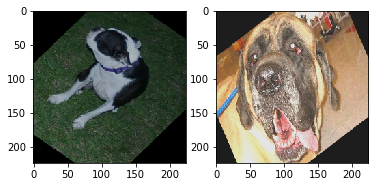

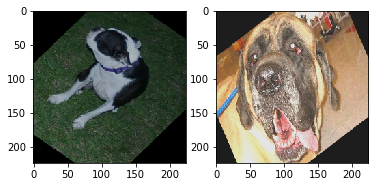

In [34]:
for i, img in enumerate(run1[0][0]):
    sp = plt.subplot(1, 2, i+1)
    plt.imshow(np.transpose(img, (1,2,0)), interpolation='nearest')
plt.show()

for i, img in enumerate(run2[0][0]):
    sp = plt.subplot(1, 2, i+1)
    plt.imshow(np.transpose(img, (1,2,0)), interpolation='nearest')
plt.show()

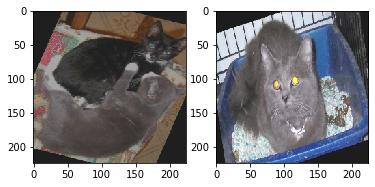

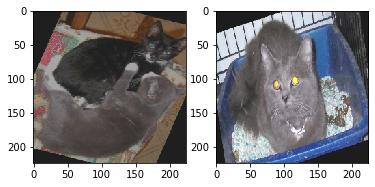

In [35]:
for i, img in enumerate(run1[1][0]):
    sp = plt.subplot(1, 2, i+1)
    plt.imshow(np.transpose(img, (1,2,0)), interpolation='nearest')
plt.show()

for i, img in enumerate(run2[1][0]):
    sp = plt.subplot(1, 2, i+1)
    plt.imshow(np.transpose(img, (1,2,0)), interpolation='nearest')
plt.show()

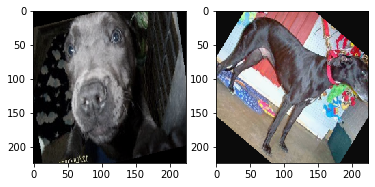

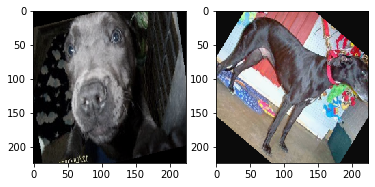

In [36]:
for i, img in enumerate(run1[2][0]):
    sp = plt.subplot(1, 2, i+1)
    plt.imshow(np.transpose(img, (1,2,0)), interpolation='nearest')
plt.show()

for i, img in enumerate(run2[2][0]):
    sp = plt.subplot(1, 2, i+1)
    plt.imshow(np.transpose(img, (1,2,0)), interpolation='nearest')
plt.show()